In [53]:
# Importing the required Libraries for CNN and ANN

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

from sklearn.metrics import classification_report

In [5]:
# Loading the MINST Data set

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

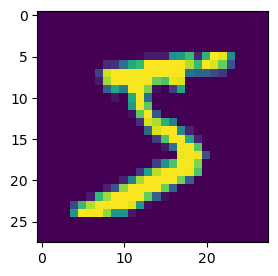

In [21]:
# VIewing the data in the X_train

plt.figure(figsize = (20, 3))
plt.imshow(X_train[0])

In [34]:
# Making the CLass Labels so that We can understand which number is corresponding to which number

classes = ['Zero : 0', 'One : 1', 'Two : 2', 'Three : 3', 'Four : 4', 'Five : 5', 'SIX : 6', 'Seven : 7', 'Eight : 8', 'Nine : 9']

In [35]:
# Making the Function to view the data 

def plot_sample(X, y, index):
    plt.figure(figsize = (20, 3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

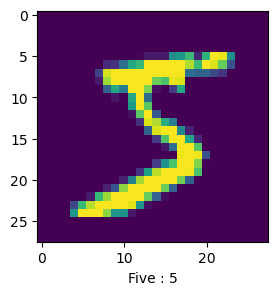

In [65]:
plot_sample(X_train, y_train, 0)

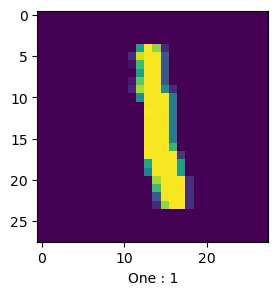

In [50]:
plot_sample(X_train, y_train, 6)

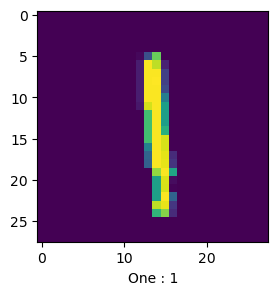

In [51]:
plot_sample(X_train, y_train, 8)

In [41]:
# Reshaping the X_train and the X_test as we saw that it can be processed through the Greyscale we will convert it into 
# Grey scale Image

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [46]:
# Dividing the entire data by 255 as we are dealing with images and we have to follow the color Band

X_train = X_train / 255
X_test = X_test / 255

In [52]:
y_train[:10]     # Just Chekcin that which number corresponds to which number

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### ANN Model

In [55]:
# First Trying out the ANN Model and seeing how it works

ann = Sequential()       # Making the Object of the Sequential Class

ann.add(Flatten(input_shape = (28, 28, 1)))     # Input Layer

ann.add(Dense(128, activation = 'relu'))        # HN 1
ann.add(Dense(64, activation = 'relu'))         # HN 2
ann.add(Dense(8, activation = 'relu'))          # HN 3
ann.add(Dense(8, activation = 'relu'))          # HN 4

ann.add(Dense(10, activation = 'softmax'))      # Output Layer


In [56]:
# Setting the Model Metrics

ann.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy']
           )

In [57]:
ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6461 - loss: 1.0277
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9584 - loss: 0.1570
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9707 - loss: 0.1022
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0621
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9856 - loss: 0.0474
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0405
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0309
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0268
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0235


In [58]:
loss, accuracy = ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.1345


In [61]:
# Seeing the predicted value

y_pred_ann = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
y_pred_ann[0]

array([4.6259068e-20, 9.5626163e-12, 3.6505963e-12, 7.0477304e-06,
       3.5377248e-09, 5.3266276e-06, 2.1927398e-27, 9.9997091e-01,
       2.1241442e-17, 1.6734311e-05], dtype=float32)

In [64]:
np.argmax(y_pred_ann[0])

7

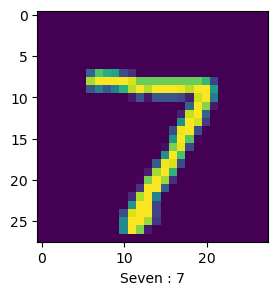

In [66]:
plot_sample(X_test, y_test, 0)

In [67]:
y_pred_ann[1]

array([1.5785649e-22, 1.0231416e-08, 9.9999940e-01, 2.8744202e-14,
       9.4005587e-20, 1.3738800e-13, 2.8207346e-13, 5.5029415e-07,
       7.3708943e-15, 3.6496141e-27], dtype=float32)

In [68]:
np.argmax(y_pred_ann[1])

2

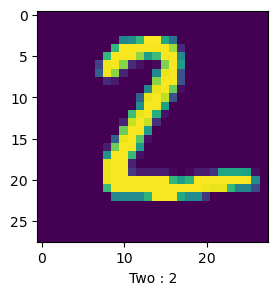

In [69]:
plot_sample(X_test, y_test, 1)

In [70]:
y_pred_ann[2]

array([5.7539753e-15, 9.9880064e-01, 9.3819272e-06, 3.4174840e-07,
       5.8939481e-10, 1.2052953e-05, 1.8548317e-11, 1.1085946e-03,
       4.8437589e-05, 2.0498544e-05], dtype=float32)

In [71]:
np.argmax(y_pred_ann[2])

1

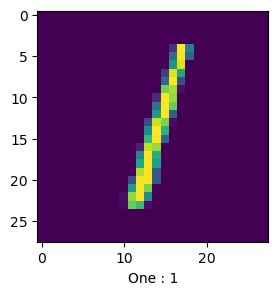

In [72]:
plot_sample(X_test, y_test, 2)

In [90]:
y_pred_ann_classes = [np.argmax(element) for element in y_pred_ann] 

In [91]:
y_pred_ann_classes[:5]

[7, 2, 1, 0, 4]

In [92]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [93]:
print('Classification Report: \n', classification_report(y_test, y_pred_ann_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### CNN Model

In [78]:
# Making the Object of the CNN Model and the Network too

cnn = Sequential()

# CNN Layer 1
cnn.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# CNN Layer 2
cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# ANN Layer 1 
cnn.add(Flatten())

# ANN Layer 2
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(32, activation = 'relu'))

# ANN Layer 3 [ Output Layer ]
cnn.add(Dense(10, activation = 'softmax'))

In [79]:
# Setting the Model Metrics

cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy']
           )

In [80]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8865 - loss: 0.3572
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9835 - loss: 0.0536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9893 - loss: 0.0346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9913 - loss: 0.0260
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9943 - loss: 0.0178
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9954 - loss: 0.0162
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9961 - loss: 0.0123
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9967 - loss: 0.0098
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9966 - loss: 0.0099
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9974 - loss: 0.0078


In [81]:
accuracy, loss = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9881 - loss: 0.0432


In [82]:
y_pred_cnn = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [83]:
y_pred_cnn[0]

array([2.1846056e-11, 2.9132571e-10, 4.3695918e-09, 7.8109628e-12,
       6.8225154e-09, 8.9853831e-14, 1.2551527e-14, 1.0000000e+00,
       7.3998190e-11, 4.6421094e-09], dtype=float32)

In [84]:
np.argmax(y_pred_cnn[0])

7

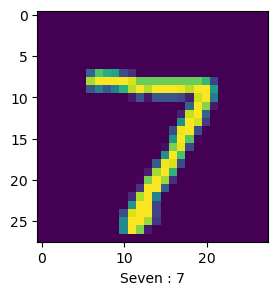

In [85]:
plot_sample(X_test, y_test, 0)

In [87]:
y_pred_cnn_classes = [np.argmax(element) for element in y_pred_ann] 

In [88]:
y_pred_cnn_classes[:5]

[7, 2, 1, 0, 4]

In [89]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [94]:
print('Classification Report: \n', classification_report(y_test, y_pred_cnn_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

